# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Trivial game described in the Homework and for which you wrote a Markov chain model:

<img src="trivial.png" width="400px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* At each intersection, the player continues along any of the possible intersecting paths with equal probability. 

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [48]:
import numpy as np

# T = Triangulo
# A = Azul
# R = Rosa
# V = Verde
# D = Dentro
# F = Fora
# O = Oco


X = {"T", "AD", "RD", "VD", "AFC", "AFO", "VFC", "VFO", "RFC", "RFO"}



# P1 = Probabilidade dos estados se sair 1.
    
P1 = np.array([
    [0, 1./3, 1./3, 1./3, 0, 0, 0, 0, 0, 0],
    [1./2, 0, 0, 0, 0, 0, 0, 0, 0, 1./2 ],
    [1./2, 0, 0, 0, 0, 0, 0, 1./2, 0, 0 ],
    [1./2, 0, 0, 0, 0, 1./2, 0, 0, 0, 0 ],
    [0, 0, 0, 0, 0, 0, 0, 1./2, 0, 1./2 ],
    [0, 0, 0, 1./3, 0, 0, 1./3, 0, 1./3, 0 ],
    [0, 0, 0, 0, 0, 1./2, 0, 0, 0, 1./2 ],
    [0, 0, 1./3, 0, 1./3, 0, 0, 0, 1./3, 0 ],
    [0, 0, 0, 0, 0, 1./2, 0, 1./2, 0, 0 ],
    [0, 1./3, 0, 0, 1./3, 0, 1./3, 0, 0, 0 ]
])

P2 = np.linalg.matrix_power(P1, 2)
P3 = np.linalg.matrix_power(P1, 3)
P4 = np.linalg.matrix_power(P1, 4)
P5 = np.linalg.matrix_power(P1, 5)
P6 = np.linalg.matrix_power(P1, 6)

# P = Matriz de probabilidades

P = (P1 + P2 + P3 + P4 + P5 + P6)*(1./6)

print(X)
print(P)

{'VFO', 'AFC', 'VD', 'AFO', 'VFC', 'RD', 'RFO', 'T', 'RFC', 'AD'}
[[ 0.18518519  0.12345679  0.12345679  0.12345679  0.04320988  0.10493827
   0.04320988  0.10493827  0.04320988  0.10493827]
 [ 0.18518519  0.12345679  0.08333333  0.08333333  0.08333333  0.06481481
   0.08333333  0.06481481  0.04320988  0.18518519]
 [ 0.18518519  0.08333333  0.12345679  0.08333333  0.08333333  0.06481481
   0.04320988  0.18518519  0.08333333  0.06481481]
 [ 0.18518519  0.08333333  0.08333333  0.12345679  0.04320988  0.18518519
   0.08333333  0.06481481  0.08333333  0.06481481]
 [ 0.06481481  0.08333333  0.08333333  0.04320988  0.12345679  0.06481481
   0.08333333  0.18518519  0.08333333  0.18518519]
 [ 0.10493827  0.04320988  0.04320988  0.12345679  0.04320988  0.18518519
   0.12345679  0.10493827  0.12345679  0.10493827]
 [ 0.06481481  0.08333333  0.04320988  0.08333333  0.08333333  0.18518519
   0.12345679  0.06481481  0.08333333  0.18518519]
 [ 0.10493827  0.04320988  0.12345679  0.04320988  0.123456

---

#### Activity 2.

Compute the probability of the following trajectories:

* "Pink with pie piece" - "Green in outer rim" - "Blue with pie slice" - "Pink in outer rim"
* "Pink with pie piece" - "Pink with pie piece" - "Blue in outer rim"
* "Center" - "Pink with pie piece" - "Blue in outer rim"

**Note:** Make sure to print the result in the end.

---

In [49]:
#P[VFC|RFO]P[AFO|VFC]P[RFC|AFO]

print(P[9,6]*P[6,5]*P[5,8])

#P[RFO|RFO]*P[AFC|RFO]

print(P[9,9]*P[9,4])

#P[RFO|T]*P[AFC|RFO]

print(P[0,9]*P[9,4])



0.00282251463474
0.0228623685414
0.0129553421734


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

Irreducible?

Yes. If we look at the probability matrix we see that all transitions have a probability bigger than 0. This means that is is possible to reach any state from any state in just one throw of the dice.

Aperiodic?

Yes. Looking again at the probability matrix, all transitions have a probability greater than 0, which means that you can reach any state starting from any state with just one move. This means that the gcd of all states is 1, and that all the states are aperiodic. So the chain is aperiodic.

Ergodic?

Yes. Since the chain is aperiodic and irreducible, there is a stationary distribution. Since Ergodic chains eventually reach a stationary distribution the chain is Ergodic.


---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [50]:
w, vector = np.linalg.eig(P.T)
print(np.real(vector[:,0]))
norma=np.linalg.norm(vector[:,0])
normvector=np.real(vector[:,0]/vector[:,0].sum())
print(normvector)
print(np.linalg.norm(normvector))

def normalizeVector(vector):
    normvector=np.real(vector[:,0]/vector[:,0].sum())
    return normvector


[ 0.38729833  0.25819889  0.25819889  0.25819889  0.25819889  0.38729833
  0.25819889  0.38729833  0.25819889  0.38729833]
[ 0.125       0.08333333  0.08333333  0.08333333  0.08333333  0.125
  0.08333333  0.125       0.08333333  0.125     ]
0.322748612184


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [51]:
from random import randint

trajectory = np.zeros( (10000, 1), dtype=np.int8 )
probs = [P1, P2, P3, P4, P5, P6]
state = 0


for i in range(0, 10000):
    dice = randint(1, 6)
    vector = probs[dice-1][state]
    state = np.random.choice(10, 1, vector.all())[0]
    trajectory[i] = state

print(trajectory)


[[8]
 [6]
 [7]
 ..., 
 [8]
 [4]
 [5]]


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #4.

**Note**: Don't forget to load `matplotlib`.

---

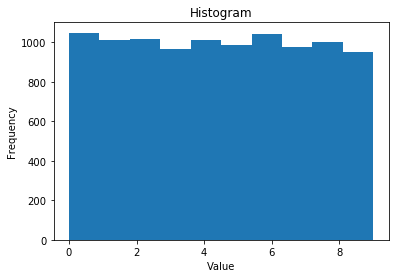

In [52]:
import numpy as np
import matplotlib.pyplot as plt


plt.hist(trajectory, bins=10)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

_Provide your answer here (double click to edit)._